# Smooth case

## construct model

In [1]:
from NSPLIB.src.instances.illustrative_examples.nonlinear_3 import const_model
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo

sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order

alg = LagrangeanAlgo(m,lag_iter=400, solver='baron')
ca = HausdorffAnalyzer(alg)

eps_min = -2
eps_max = 1
steps = 4

tol = 1e-30
y_val={0: 6.531128925558817}
eps_list, distances= ca.analyze(y=y_val.copy(), v=-113.8094952092636,y_optimal=True, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)
eps_list,distances

Calculating the Hausdorff distances...
	diameter = 1.0E+01, distance = 4.28E+01
	diameter = 1.0E+00, distance = 5.23E+00
	diameter = 1.0E-01, distance = 1.20E+00
	diameter = 1.0E-02, distance = 2.77E-02
Done!


(array([10.  ,  1.  ,  0.1 ,  0.01]),
 [42.847582989277456,
  5.225283877178569,
  1.196673386572897,
  0.027731654490509072])

In [25]:
# 1.0 0.36106722597209284

# 0.1 0.003589720900009752

# 0.01 3.589512613189072e-05

# 0.001 3.589510555457309e-07
def v_2(x):
    return 5/3*x-400/x

import numpy as np
for i in np.logspace(0,-3,4):
    yl,yu=6.531128925558817 - i / 2, 6.531128925558817 + i / 2
    slope_2 = (v_2(yu) - v_2(yl)) / (yu - yl)
    slope_3 = 5/3
    print(-slope_2-slope_3,slope_2,slope_3)

-12.766039747804095 11.09937308113743 1.6666666666666667
-12.711305335247394 11.044638668580728 1.6666666666666667
-12.710761198725937 11.04409453205927 1.6666666666666667
-12.710755757674084 11.044089091007418 1.6666666666666667


In [2]:
distances0=[24.584292802992323,0.3610660777352024,0.0035885698387545517,3.474408588033384e-05]
distances10=[29.621658257730914,
  0.9994334720345392,
  0.06720126518771963,
  0.006612050186788565]
distances1=[23.735587858798297,
  0.4249826832610921,
  0.01000217965618333,
  0.0009618129592183777]
distances01=[23.14698304671832,
  0.3675385019081716,
  0.004284491778946631,
  0.0003970840518405794]

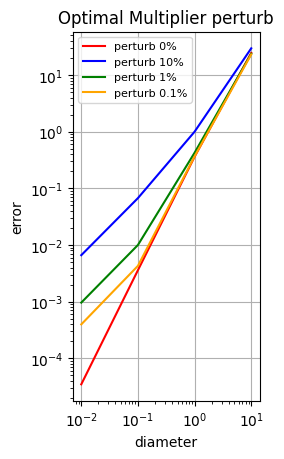

In [8]:
import matplotlib.pyplot as plt
font = {
        'size'   : 10}
import matplotlib
matplotlib.rc('font', **font)
fig,ax=plt.subplots()
import numpy as np
eps_list = np.logspace(1,-2,4)
ax.loglog(eps_list, distances0,color='red',label='perturb 0%')
ax.loglog(eps_list, distances10,color='blue',label='perturb 10%')
ax.loglog(eps_list, distances1,color='green',label='perturb 1%')
ax.loglog(eps_list, distances01,color='orange',label='perturb 0.1%')
ax.legend()
ax.legend(fontsize=8)
ax.set_title('Optimal Multiplier perturb')
ax.set_xlabel('diameter')
ax.set_ylabel('error')
ax.set_xticks([1e1,1e0,1e-1,1e-2,1e-3,1e-4])
ax.axis('scaled')
ax.grid()


In [ ]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order
from NSPLIB.src.instances.illustrative_examples.nonlinear_3 import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
import numpy as np
import matplotlib.pyplot as plt
from pyomo.opt import SolverFactory
import copy
sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
y_val_fix={0: 6.53112892356528}
steps=50
scenario_list=["s1", "s2", "s3"]
idx=0
idx_interval=np.linspace(6.52,6.54, steps)
node_interval={0:(6.52,6.54)}
lag_iter=400
val_func_obj={}
relaxed_func={}
for scenario in scenario_list:
    val_func_obj[scenario]=[]
    relaxed_func[scenario]=[]
    aux_model=copy.deepcopy(m.aux_models["lag"][scenario])
    for idx_val in idx_interval:
        aux_model.y[0].fix(idx_val)
        result=SolverFactory("baron").solve(aux_model)
        val_func_obj[scenario].append(result['Problem'][0]['Lower bound'])

sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg = LagrangeanAlgo(m,lag_iter=lag_iter, solver='baron')
from src.models.bb_node import BranchBoundNode
from src.analyses.convergence_analysis import HausdorffAnalyzer 
node=BranchBoundNode(node_interval)
lbd,mu_set, obj_set=alg.calc_lbd(node)
for scenario in scenario_list:
    for k in idx_interval:
        relaxed_func[scenario].append(obj_set[-1][scenario] + sum([k * mu_set[-1][scenario][idx] for idx in node_interval]))

Building models...
Done.
Building models...
Done.


iter 0 stepsize 0.1 subgradient {'s1': {0: 0}, 's2': {0: 0.011128874183317095}, 's3': {0: 0.011128874183317095}}
direction {'s1': {0: 0.0}, 's2': {0: 0.005564437091658547}, 's3': {0: 0.005564437091658547}} multiplier {'s1': {0: -0.0011128874183317095}, 's2': {0: 0.0005564437091658547}, 's3': {0: 0.0005564437091658547}}
iter 1 stepsize 0.067 subgradient {'s1': {0: 0}, 's2': {0: 0.011130134843313932}, 's3': {0: 0.011130134843313932}}
direction {'s1': {0: 0.0}, 's2': {0: 0.00834728596748624}, 's3': {0: 0.00834728596748624}} multiplier {'s1': {0: -0.002231423737974866}, 's2': {0: 0.001115711868987433}, 's3': {0: 0.001115711868987433}}
iter 2 stepsize 0.067 subgradient {'s1': {0: 0}, 's2': {0: 0.011130134843313932}, 's3': {0: 0.011130134843313932}}
direction {'s1': {0: 0.0}, 's2': {0: 0.009738710405400086}, 's3': {0: 0.009738710405400086}} multiplier {'s1': {0: -0.0035364109322984774}, 's2': {0: 0.0017682054661492387}, 's3': {0: 0.0017682054661492387}}
iter 3 stepsize 0.067 subgradient {'s1

## SBB run

In [ ]:
alg = LagrangeanAlgo(m, solver='baron')

# # # SBB solve
# alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-4)
# alg.save_res(model_name='nonlinear_3')

# # load previous results
# # alg.load_res(path='_results/fleccs/04212023_173747.pickle')

In [ ]:
# final results
alg.res.sol

{}

## bb node vs. gap plot

In [ ]:
# alg.res.plot_bb_n_gap('semilogy')

## convergence order

### solve full model to obtain optimal y value

In [1]:
import numpy as np
from pyomo.environ import value
from pyomo.environ import SolverFactory
from NSPLIB.src.instances.illustrative_examples.nonlinear_3 import const_model
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo

sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
ori_m = m.origin_model
opt = SolverFactory('baron')
opt.options['epsr'] = 1e-12
opt.options['epsa'] = 1e-20
res_ori = opt.solve(ori_m)
y_set = m.y_set.copy()
y_val = {i: value(ori_m.y[i]) for i in y_set}
v_val = value(ori_m.obj)

def find_x1_0(y):

    x1_val_max_1 = 2 * y - 10
    if y != 0:
        x1_val_max_2 = 20 / y
    else:
        x1_val_max_2 = float('inf')
    x1_val_max_3 = 23.911
    x1_val_max = min(x1_val_max_1, x1_val_max_2, x1_val_max_3)

    x1_val_min_1 = 0
    x1_val_min_2 = -2
    x1_val_min = max(x1_val_min_1, x1_val_min_2)

    if x1_val_max >= x1_val_min:
        return x1_val_max
    else:
        return float('inf')

def v_10(y):
    return 5 / 3 * y - 10 * find_x1_0(y)

def find_x2_0(y):

    x2_val_max_1 = 4.5 * y - 10
    if y != 0:
        x2_val_max_2 = 20 / y
    else:
        x2_val_max_2 = float('inf')
    x2_val_max_3 = 7.23793
    x2_val_max = min(x2_val_max_1, x2_val_max_2, x2_val_max_3)

    x2_val_min_1 = 0
    x2_val_min_2 = -2
    x2_val_min = max(x2_val_min_1, x2_val_min_2)

    if x2_val_max >= x2_val_min:
        return x2_val_max
    else:
        return float('inf')

def v_20(y):
    return 5 / 3 * y - 20 * find_x2_0(y)

def find_x3_0(y):

    x3_val_max_1 = 10 * y - 10
    if y != 0:
        x3_val_max_2 = 20 / y
    else:
        x3_val_max_2 = float('inf')
    x3_val_max_3 = 1.81991
    x3_val_max = min(x3_val_max_1, x3_val_max_2, x3_val_max_3)

    x3_val_min_1 = 0
    x3_val_min_2 = -2
    x3_val_min = max(x3_val_min_1, x3_val_min_2)

    if x3_val_max >= x3_val_min:
        return x3_val_max
    else:
        return float('inf')

def v_30(y):
    return 5 / 3 * y - 30 * find_x3_0(y)


def v0(y):
    return v_10(y) + v_20(y) + v_30(y)

def v_lg_overall(yl, yu):

    def v_lg_10(y):
        slope_2 = (v_20(yu) - v_20(yl)) / (yu - yl)
        slope_3 = (v_30(yu) - v_30(yl)) / (yu - yl)
        slope_1 = 0 - slope_2 - slope_3

        return slope_1 * (y - y_val[0]) + v_10(y_val[0])

    def v_lg_20(y):
        return (v_20(yu) - v_20(yl)) / (yu - yl) * (y - yl) + v_20(yl)

    def v_lg_30(y):
        return v_30(y)


    def v_lg0(y):
        print(v_lg_10(y) , v_lg_20(y) ,v_lg_30(y))
        return v_lg_10(y) + v_lg_20(y) + v_lg_30(y)

    return v0(y_val[0]) - v_lg0((yl + yu) / 2)

Building models...
Done.


In [3]:
yl, yu = 5, y_val[0] + 10 / 2
slope_2 = (v_20(yu) - v_20(yl)) / (yu - yl)
slope_3 = (v_30(yu) - v_30(yl)) / (yu - yl)
slope_2, slope_3

(8.604408887448164, 2.0592838349039955)

In [11]:
eps_list = np.logspace(1, 1, 1)
for eps in eps_list:
    yl, yu = y_val[0] - eps / 2, y_val[0] + eps / 2
    print(eps, v_lg_overall(yl, yu))


nan nan -43.712085124098465
10.0 nan


/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_67178/211016394.py:96: RuntimeWarning: invalid value encountered in scalar multiply
  return slope_1 * (y - y_val[0]) + v_10(y_val[0])
/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_67178/211016394.py:99: RuntimeWarning: invalid value encountered in scalar add
  return (v_20(yu) - v_20(yl)) / (yu - yl) * (y - yl) + v_20(yl)


In [ ]:
import pandas as pd

df = pd.read_csv('./results/LG/illustrative_example/res.csv')
df

,eps,LG,idealized_LG
0,1.0000,0.63900,3.609633e-01
1,0.1000,0.30900,3.589721e-03
2,0.0100,0.05870,3.589513e-05
3,0.0010,0.00642,3.589511e-07
4,0.0001,0.00079,3.589520e-09


/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_48444/2312851207.py:72: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig('LG_compare.png', dpi=300, bbox_inches="tight")
/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


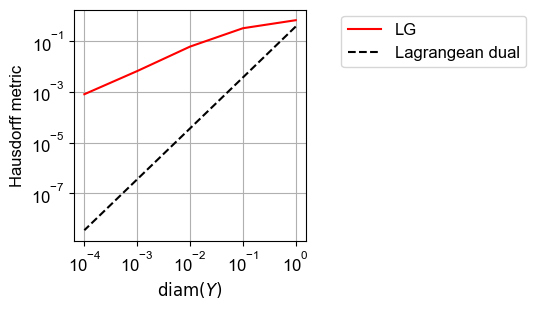

In [ ]:
import matplotlib.pyplot as plt

def find_largest_power_10_smaller_than_equal(x):

    res = 1

    if x >= 1:
        while res * 10 <= x:
            res *= 10
        return res
    else:
        multiplier = 1
        while res > x * multiplier:
            multiplier *= 10
        return res / multiplier


def find_smallest_power_10_larger_than_equal(x):

    res = 1

    if x >= 1:
        while res < x:
            res *= 10
        return res
    else:
        while res * 0.1 >= x:
            res *= 0.1
        return res

eps_list = df['eps'].values

x_tick_n = 5
metric = 'Hausdorff'

plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-4-4', 'fontsize-12']])

fig, ax = plt.subplots(figsize=(3, 3))

ax.loglog(df['eps'], df['LG'], 'r-', label='LG')
ax.loglog(df['eps'], df['idealized_LG'], 'k--', label='Lagrangean dual')
# # log-log plot for normal situation
# if sum(distances) > 0:
#     ax.loglog(eps_list, distances, 'b-')
# # semi-log-x for all-zero case
# else:
#     ax.semilogx(eps_list, distances, 'b-')

# plot grid
ax.grid(True, which='major', axis='both')
# remove minor ticks
ax.minorticks_off()

# generate x ticks
eps_min, eps_max = min(eps_list), max(eps_list)
# get power of 10's for max and min ticks
tick_min = find_largest_power_10_smaller_than_equal(eps_min)
tick_max = find_smallest_power_10_larger_than_equal(eps_max)
tick_min_log = round(np.log10(tick_min))
tick_max_log = round(np.log10(tick_max))
power_diff = tick_max_log - tick_min_log + 1
ticks = np.logspace(tick_min_log, tick_max_log, min(x_tick_n, power_diff))
ax.set_xticks(ticks)

# set labels
ax.set_xlabel(r"$\mathrm{diam}(Y)$")
ax.set_ylabel(f"{metric} metric")

ax.legend(loc=(1.15, 0.75))
# fig.tight_layout()

fig.savefig('LG_compare.png', dpi=300, bbox_inches="tight")